In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interactive, FloatLogSlider
%matplotlib notebook

In [37]:
# define constants
G = 6.67*10**(-11) # in SI units
c = 299792458 # meters/second
dtau = 1

# initial condition
Ms = 2e30
M = 4*Ms
m = Ms
Rstar = 7e8
rs = 2*G*M/c**2
r0 = 15*rs #m
theta0 = np.pi/2
vr0 = 0 #m/s
vt0 = 220000 #m/s

In [38]:
r_array = [r0]
theta_array = [theta0]
t_array = [0]
n = 0
r = r0
t = 0
theta = theta0
vr = vr0
vtheta = vt0/r
L = m*vtheta*r
Veff = -(G*M*m)/r + (L**2)/(2*m*r**2)-L**2*G*M/(r**3*m*c**2)
E = m*c**2 * np.sqrt(1 + (1/c**2)*vr**2+(2/(m*c**2)*Veff))

while np.abs(r) > rs and n <=10000:
    dr = - (dtau * (np.sqrt((E/m/c)**2 - (L/m/r)**2*(1-(rs/r)) - c**2 * (1-(rs/r)))))
    dtheta = dtau * L/(m*r**2)
    dt = E/m/c**2/(1-(rs/r)) * dtau
    r = r + dr
    theta = theta + dtheta
    t = t + dt
    r_array.append(r)
    theta_array.append(theta)
    t_array.append(t)
    vr = dr/dtau
    vtheta = vt0/r
    L = m*vtheta*r
    Veff = -G*M*m/r + L**2/(2*m*r**2)-L**2*G*M/(r**3*m*c**2)
    E = m*c**2 * np.sqrt(1 + 1/c**2*vr**2+2/(m*c**2)*Veff)
    n += 1
    
r_array = np.array(r_array)
theta_array = np.array(theta_array)
t_array = np.array(t_array)

<ipython-input-38-148cdc0fbb8c>:28: RuntimeWarning: invalid value encountered in sqrt
  E = m*c**2 * np.sqrt(1 + 1/c**2*vr**2+2/(m*c**2)*Veff)


In [39]:
# The data need for plotting the rs
tdepoint = Rstar * (M/m)**(1/3)
theta1 = np.linspace(0, 2 * np.pi, 100)
rsx = rs * np.cos(theta1)
rsy = rs * np.sin(theta1)
rtx = tdepoint * np.cos(theta1)
rty = tdepoint * np.sin(theta1)

In [40]:
def polartocartesian(r, theta):
    # returns two arrays: one describing the position in the x axis, and the other, the y axis. 
    # x[i] corresponds to y[i] for i in len(listtheta)
    x_array = r * np.cos(theta)
    y_array = r * np.sin(theta)
    return x_array, y_array

In [41]:
r_array

array([178113.02097306, 178109.02097306, 178105.02097306, ...,
        12054.18524371,  11937.62946308,  11821.01632059])

In [42]:
x_array, y_array = polartocartesian(r_array, theta_array)

In [43]:
r_array

array([178113.02097306, 178109.02097306, 178105.02097306, ...,
        12054.18524371,  11937.62946308,  11821.01632059])

<IPython.core.display.Javascript object>


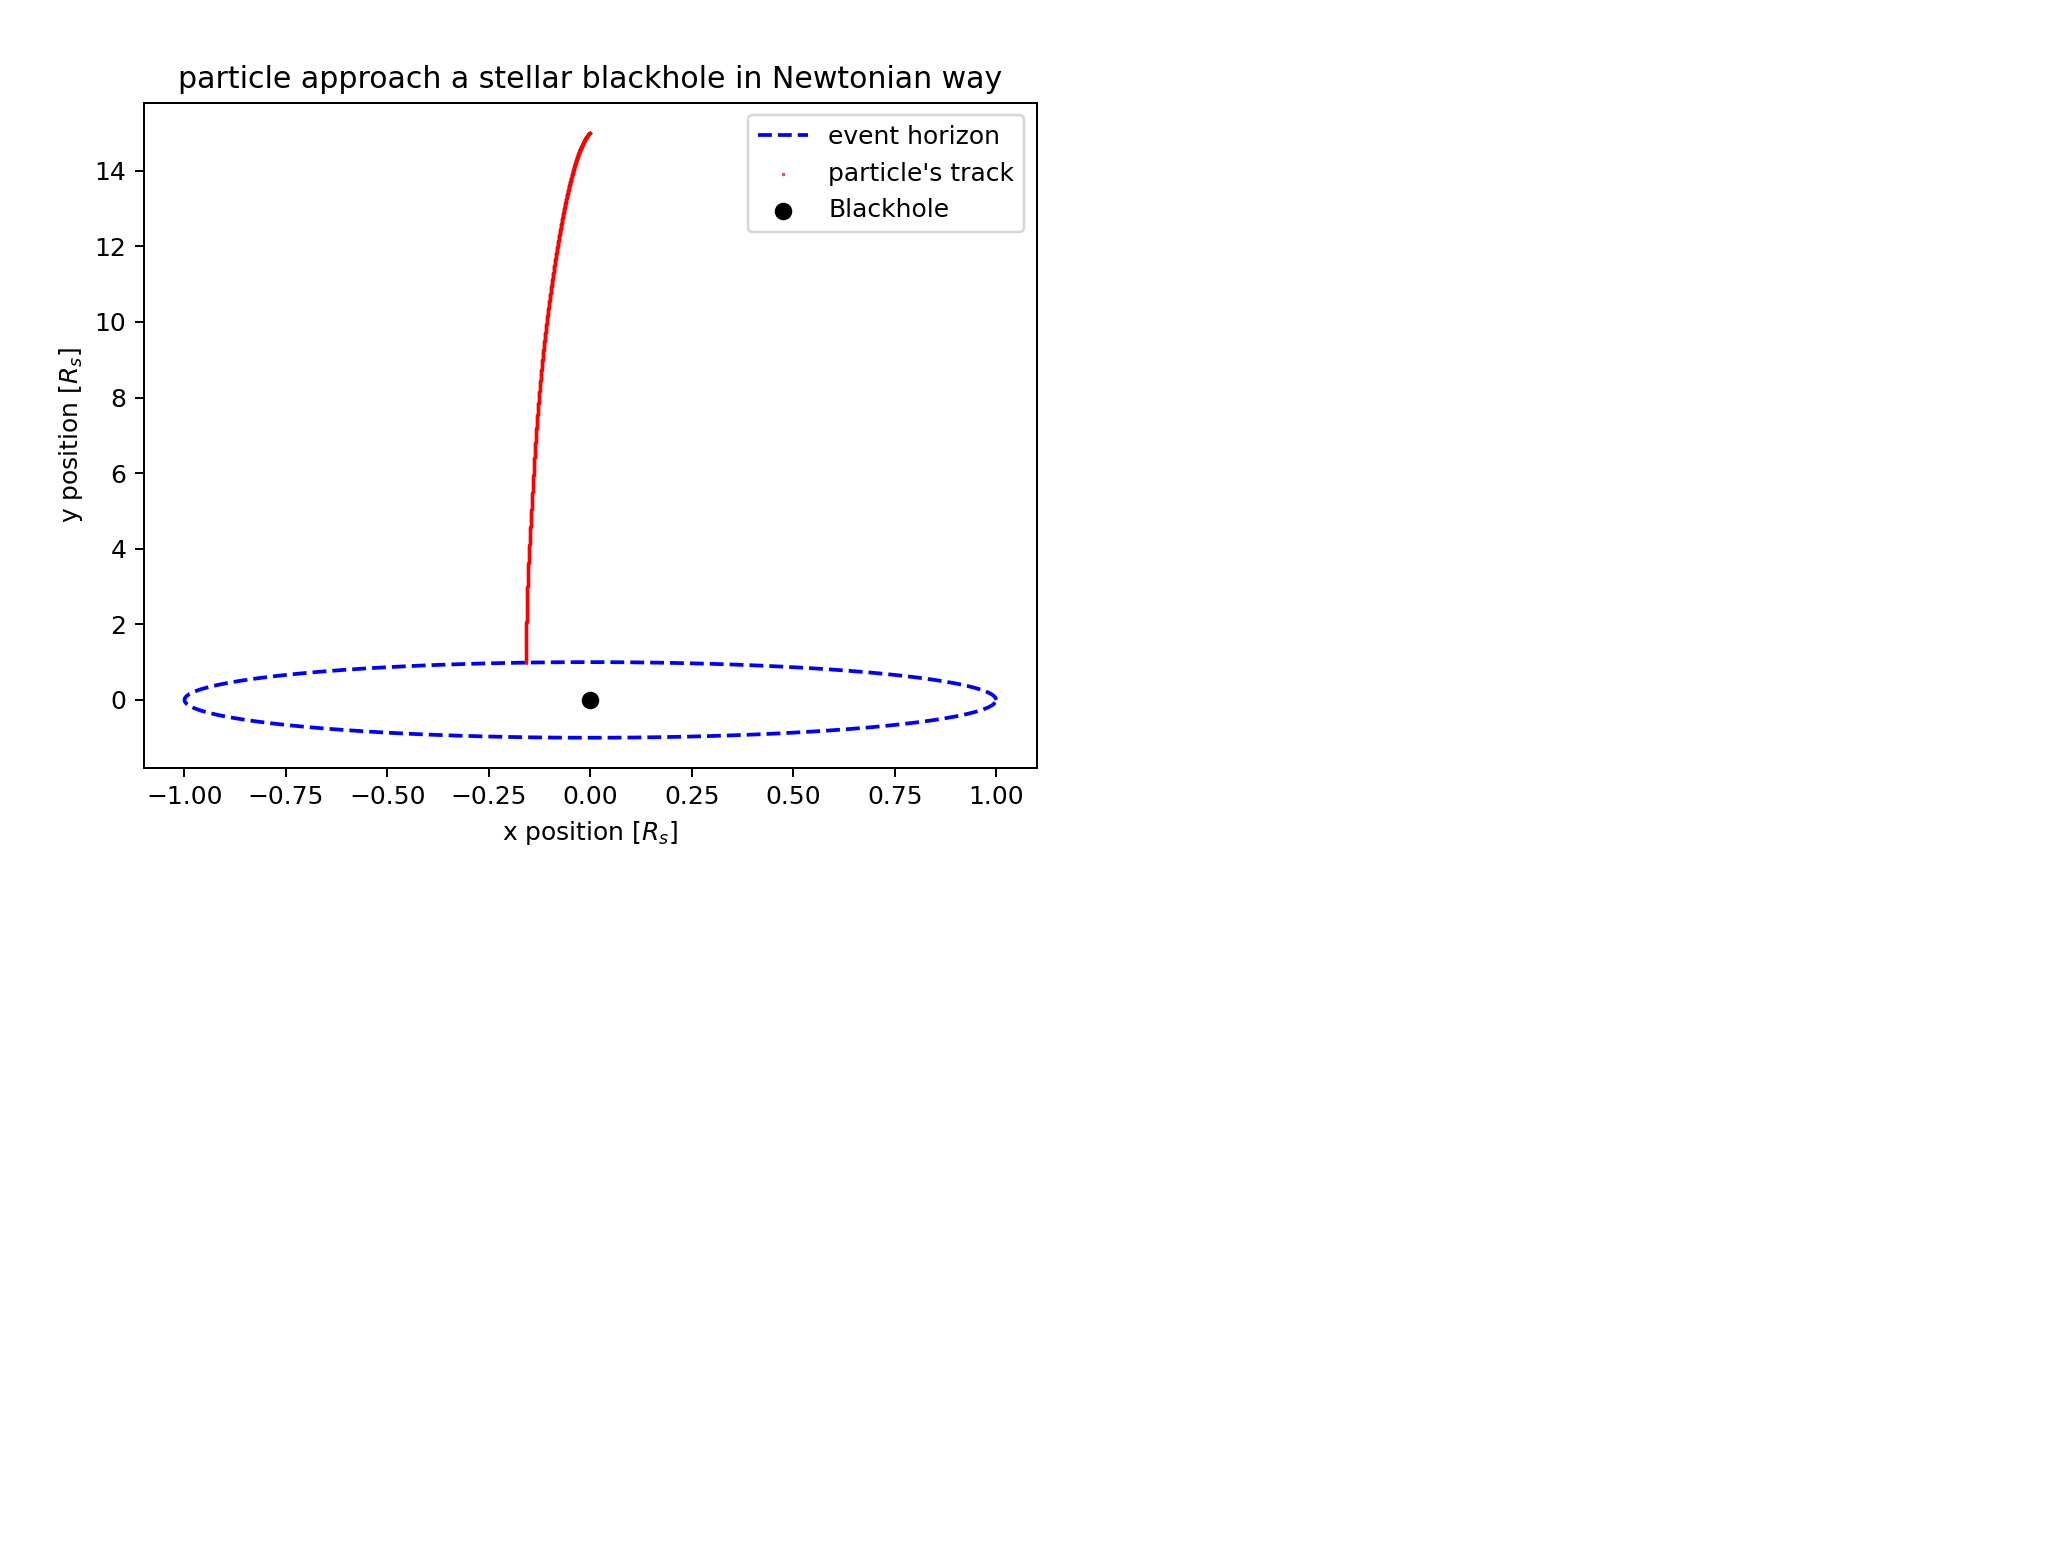

Text(0, 0.5, 'y position [$R_s$]')

In [46]:
plt.figure()
plt.scatter(x_array/rs, y_array/rs, c = 'r', s=0.1, label = "particle's track")
plt.scatter(0,0, c = 'k', label = "Blackhole")
plt.plot(rsx/rs,rsy/rs, '--',  c = 'blue', label = "event horizon")
#plt.plot(rtx/rs,rty/rs, c = 'orange', label = "tidal disruption radius")
plt.legend()
plt.title("particle approach a stellar blackhole in Newtonian way")
plt.xlabel(r'x position [$R_s$]')
plt.ylabel("y position [$R_s$]")

In [ ]:
def plot_function(MBH, vx, vy, x0, y0):
    dt = 0.1
    M = MBH * Ms
    rs = 2*G*M/c**2
    x = x0 * rs
    y = y0 * rs
    x_array = [x]
    y_array = [y]
    while x>0 and y>0 and np.sqrt(x**2+y**2)>rs:
        a = -G*M/(x**2+y**2)
        a_x = a * x / np.sqrt(x**2+y**2)
        a_y = a * y / np.sqrt(x**2+y**2)
        vx = vx + a_x * dt
        vy = vy + a_y * dt
        x = x + vx * dt
        y = y + vy * dt
        x_array.append(x)
        y_array.append(y)
    x_array = x_array[:-1]
    y_array = y_array[:-1]
    x_array = np.array(x_array)
    y_array = np.array(y_array)
    theta = np.linspace(0, 2 * np.pi, 100)
    rsx = rs * np.cos(theta)
    rsy = rs * np.sin(theta)
    plt.figure()
    plt.plot(rsx/rs,rsy/rs, label = "schwarzschild radius")
    plt.plot(x_array/rs, y_array/rs,'*', c = 'r', label = "newtonian trajectory")
    ax.title.set_text('Trajectory of a particle Moving Towards a \n Black Hole')
    plt.xlabel("x position [Rs]")
    plt.ylabel("y position [Rs]")
    plt.scatter(0,0, c = 'k')
    plt.show()

In [33]:
# initial condition
dtau = 1000
Ms = 2e30
M = 1e6*Ms
m = 10*Ms
Rstar = 7e8
rs = 2*G*M/c**2
r0 = 2*rs #m
theta0 = np.pi/2
vr0 = 0 #m/s
vtheta0 = 2200000/r0 #rad/s

In [34]:
r_array = [r0]
theta_array = [theta0]
t_array = [0]
n = 0
r = r0
t = 0
theta = theta0
vr = vr0
vtheta = vt0/r
L = m*vtheta*r
Veff = -(G*M*m)/r + (L**2)/(2*m*r**2)-L**2*G*M/(r**3*m*c**2)
E = m*c**2 * np.sqrt(1 + (1/c**2)*vr**2+(2/(m*c**2)*Veff))

while np.abs(r) > rs and n <=10000:
    dr = - (dtau * (np.sqrt(np.abs((E/(m*c))**2 - (L/(m*r))**2*(1-(rs/r)) - c**2 * (1-(rs/r))))))
    print((E/(m*c))**2, (L/(m*r))**2*(1-(rs/r)), c**2 * (1-(rs/r)), dr)
    dtheta = dtau * L/(m*r**2)
    dt = E/m/c**2/(1-(rs/r)) * dtau
    r = r + dr
    theta = theta + dtheta
    t = t + dt
    r_array.append(r)
    theta_array.append(theta)
    t_array.append(t)
    vr = dr/dtau
    vtheta = vt0/r
    L = m*vtheta*r
    Veff = -G*M*m/r + L**2/(2*m*r**2)-L**2*G*M/(r**3*m*c**2)
    E = m*c**2 * np.sqrt(1 + 1/c**2*vr**2+2/(m*c**2)*Veff)
    n += 1
    
r_array = np.array(r_array)
theta_array = np.array(theta_array)
t_array = np.array(t_array)

4.4937758936840904e+16 6.865410910646821e-10 4.493775893684088e+16 -4898.979485566356
4.493772185656351e+16 6.865416575618484e-10 4.493772185656349e+16 -4898.979485566356
4.4937684776224936e+16 6.865422240590144e-10 4.493768477622491e+16 -4898.979485566356
4.493764769582516e+16 6.865427905561806e-10 4.493764769582513e+16 -5656.85424949238
4.493760487899145e+16 6.865434446907631e-10 4.493760487899142e+16 -4898.979485566356
4.4937567798459816e+16 6.865440111879293e-10 4.4937567798459784e+16 -5656.85424949238
4.4937524981473864e+16 6.865446653225121e-10 4.493752498147382e+16 -6324.555320336759
4.493747711053164e+16 6.865453966672088e-10 4.49374771105316e+16 -6324.555320336759
4.493742923948745e+16 6.865461280119053e-10 4.49374292394874e+16 -6928.203230275509
4.4937376799268856e+16 6.865469291598802e-10 4.493737679926882e+16 -6324.555320336759
4.493732892801096e+16 6.865476605045765e-10 4.49373289280109e+16 -8000.0
4.493726837498107e+16 6.865485855905749e-10 4.493726837498101e+16 -8000.0
4

4.4737359529174056e+16 6.8958899883546e-10 4.473735952916909e+16 -70484.04074682438
4.473682126209515e+16 6.895971483293986e-10 4.473682126209018e+16 -70540.76835419358
4.473628254895003e+16 6.896053043769958e-10 4.473628254894505e+16 -70597.45037889117
4.473574339005538e+16 6.896134669729529e-10 4.473574339005037e+16 -70767.22405181652
4.473520292165789e+16 6.896216491930772e-10 4.4735202921652856e+16 -70936.5914038728
4.473466114676724e+16 6.896298509903356e-10 4.47346611467622e+16 -70992.9573971954
4.473411892836353e+16 6.896380592992984e-10 4.473411892835846e+16 -71161.78749862878
4.473357540742427e+16 6.896462871231882e-10 4.473357540741918e+16 -71330.21800050803
4.473303058690804e+16 6.896545344157486e-10 4.4733030586902936e+16 -71442.284397967
4.473248489724605e+16 6.896627946600411e-10 4.4732484897240936e+16 -71498.2517268779
4.47319387668866e+16 6.896710613697888e-10 4.473193876688148e+16 -71554.17527999327
4.473139219613258e+16 6.896793345399025e-10 4.473139219612743e+16 -717

4.431819123063756e+16 6.958742959384938e-10 4.431819123062751e+16 -100239.71268913335
4.4317411440237944e+16 6.95885873751244e-10 4.43174114402279e+16 -100199.8003990028
4.4316631933646904e+16 6.958974469198477e-10 4.431663193363685e+16 -100279.6090937734
4.431585177947504e+16 6.959090292721235e-10 4.431585177946497e+16 -100359.35432235502
4.431507097815096e+16 6.959206208006129e-10 4.431507097814087e+16 -100439.03623591775
4.4314289530102104e+16 6.959322214978752e-10 4.431428953009199e+16 -100558.44071981228
4.431350712619299e+16 6.959438359517148e-10 4.431350712618286e+16 -100637.965003273
4.431272407663398e+16 6.959554595558376e-10 4.431272407662383e+16 -100757.13374248
4.431194007287613e+16 6.959670968889977e-10 4.431194007286595e+16 -100876.16170334793
4.431115511591777e+16 6.959787479347658e-10 4.431115511590758e+16 -100915.8064923429
4.431036982340529e+16 6.959904035243747e-10 4.43103698233951e+16 -100915.8064923429
4.430958450382364e+16 6.960020590788572e-10 4.430958450381344e+

4.376331923838496e+16 7.040025283829753e-10 4.3763319238369464e+16 -124482.93055676347
4.376232711660818e+16 7.040168619398806e-10 4.376232711659268e+16 -124482.93055676347
4.3761334952138696e+16 7.040311953917454e-10 4.376133495212321e+16 -124450.79348883237
4.376034300113192e+16 7.040455250381235e-10 4.376034300111642e+16 -124515.05933018704
4.37593504951768e+16 7.040598619790042e-10 4.375935049516129e+16 -124547.17981552212
4.375835769045069e+16 7.040742025128795e-10 4.375835769043516e+16 -124611.39594756172
4.375736433105673e+16 7.040885503350664e-10 4.375736433104119e+16 -124643.49160706307
4.3756370672995944e+16 7.041029017469749e-10 4.37563706729804e+16 -124675.5790040696
4.37553767162984e+16 7.041172567474752e-10 4.375537671628284e+16 -124739.7290361014
4.375438220529731e+16 7.041316190279994e-10 4.3754382205281736e+16 -124803.84609458156
4.375338714018664e+16 7.041459885844893e-10 4.375338714017105e+16 -124867.93023030373
4.375239152115993e+16 7.041603654128914e-10 4.375239152

4.308306920753721e+16 7.136585693633411e-10 4.308306920751631e+16 -144554.48799674123
4.308188286989599e+16 7.136751045225092e-10 4.308188286987509e+16 -144582.15657542253
4.308069624500911e+16 7.136916426093981e-10 4.30806962449882e+16 -144609.81986020177
4.307950933288088e+16 7.137081836230899e-10 4.307950933285995e+16 -144665.13056020098
4.3078321906533576e+16 7.137247307256193e-10 4.307832190651263e+16 -144720.42012100434
4.307713396606697e+16 7.137412839141194e-10 4.307713396604604e+16 -144665.13056020098
4.307594641916748e+16 7.137578305403231e-10 4.307594641914653e+16 -144748.05698177783
4.307475813120694e+16 7.137743864129656e-10 4.3074758131185976e+16 -144803.31487918363
4.3073569329235064e+16 7.137909483668815e-10 4.307356932921408e+16 -144858.55169785456
4.3072380013351144e+16 7.13807516399209e-10 4.307238001333017e+16 -144830.93592185338
4.3071190863768664e+16 7.138240810335315e-10 4.307119086374769e+16 -144830.93592185338
4.3070001653758056e+16 7.138406454282178e-10 4.3070

4.227874544142151e+16 7.246184787714948e-10 4.22787454413951e+16 -162505.384526175
4.227736553533901e+16 7.246368433817606e-10 4.22773655353126e+16 -162505.384526175
4.227598554924283e+16 7.246552075321049e-10 4.2275985549216424e+16 -162505.384526175
4.2274605483126056e+16 7.246735712222359e-10 4.227460548309963e+16 -162554.6062097288
4.227322491893348e+16 7.246919400138791e-10 4.227322491890705e+16 -162579.2114632126
4.227184406566907e+16 7.247103111247519e-10 4.227184406564264e+16 -162579.2114632126
4.227046313229042e+16 7.247286817741161e-10 4.227046313226398e+16 -162579.2114632126
4.226908211879055e+16 7.247470519616792e-10 4.226908211876412e+16 -162579.2114632126
4.226770102516247e+16 7.247654216871477e-10 4.226770102513605e+16 -162554.6062097288
4.22663200604365e+16 7.247837881702016e-10 4.226632006041007e+16 -162554.6062097288
4.226493901559264e+16 7.248021541907158e-10 4.226493901556622e+16 -162529.99723128037
4.22635580997171e+16 7.248205169680889e-10 4.226355809969069e+16 -16

4.136170474872073e+16 7.364810172572491e-10 4.136170474868949e+16 -176748.4087622856
4.1360145503335416e+16 7.365005938641174e-10 4.1360145503304184e+16 -176725.77627499617
4.13585863573972e+16 7.365201671746664e-10 4.135858635736595e+16 -176771.03835187483
4.135702671188397e+16 7.365397447079789e-10 4.135702671185271e+16 -176793.66504487654
4.13554667664396e+16 7.365593239562665e-10 4.1355466766408344e+16 -176793.66504487654
4.135390672068262e+16 7.36578902413108e-10 4.135390672065137e+16 -176793.66504487654
4.135234657460337e+16 7.365984800780569e-10 4.135234657457212e+16 -176771.03835187483
4.1350786527884584e+16 7.366180544451985e-10 4.135078652785332e+16 -176816.28884240275
4.134922598146492e+16 7.366376330301701e-10 4.134922598143363e+16 -176884.1428732378
4.1347664735743896e+16 7.366572183346174e-10 4.134766473571259e+16 -176929.36443677178
4.134610299037811e+16 7.366768078513761e-10 4.13461029903468e+16 -176951.97088475732
4.134454094492242e+16 7.366963990756076e-10 4.134454094

4.032382492189039e+16 7.49050364286529e-10 4.032382492185364e+16 -191708.11146114816
4.032206056222509e+16 7.490709304184078e-10 4.032206056218832e+16 -191749.83702731016
4.032029569285351e+16 7.490914997215756e-10 4.032029569281674e+16 -191770.6964058899
4.031853050575354e+16 7.491120699563587e-10 4.031853050571673e+16 -191854.11124080713
4.031676442500642e+16 7.491326478310014e-10 4.031676442496961e+16 -191854.11124080713
4.031499821837785e+16 7.491532243970609e-10 4.031499821834104e+16 -191854.11124080713
4.031323188585439e+16 7.491737996538516e-10 4.031323188581758e+16 -191854.11124080713
4.031146542742257e+16 7.491943736006862e-10 4.031146542738577e+16 -191833.26093250877
4.030969903506451e+16 7.492149440011572e-10 4.0309699035027704e+16 -191854.11124080713
4.030793232478928e+16 7.492355153261601e-10 4.030793232475247e+16 -191854.11124080713
4.0306165488565304e+16 7.492560853391447e-10 4.03061654885285e+16 -191854.11124080713
4.030439852637911e+16 7.492766540394232e-10 4.030439852

3.916409448560102e+16 7.619596897362466e-10 3.916409448556014e+16 -202188.0312976018
3.916214554810979e+16 7.619803374133281e-10 3.916214554806891e+16 -202188.0312976018
3.9160196460809976e+16 7.620009830986317e-10 3.91601964607691e+16 -202168.24676491608
3.9158247414428664e+16 7.620216247712463e-10 3.9158247414387784e+16 -202188.0312976018
3.9156298027474504e+16 7.620422664702539e-10 3.9156298027433624e+16 -202188.0312976018
3.9154348490659944e+16 7.620629061745474e-10 3.9154348490619064e+16 -202188.0312976018
3.915239880396769e+16 7.620835438831471e-10 3.915239880392681e+16 -202188.0312976018
3.9150448967380424e+16 7.621041795950737e-10 3.915044896733956e+16 -202148.46029589244
3.9148499362535016e+16 7.621248092712381e-10 3.914849936249413e+16 -202207.81389451792
3.914654903532162e+16 7.62145443005831e-10 3.914654903528072e+16 -202227.59455623262
3.914459836732231e+16 7.62166076758588e-10 3.914459836728141e+16 -202247.37328331362
3.914264735849447e+16 7.621867105277418e-10 3.91426473

3.787883048733565e+16 7.747832439626225e-10 3.787883048728967e+16 -214420.1483070096
3.787665753966103e+16 7.74803552141367e-10 3.787665753961504e+16 -214457.4549881631
3.787448403224762e+16 7.748238608256563e-10 3.78744840322016e+16 -214513.40284467075
3.787230977602745e+16 7.74844171777357e-10 3.78723097759814e+16 -214587.97729602654
3.787013458201706e+16 7.748644867558998e-10 3.7870134581971e+16 -214606.61685977905
3.786795901706507e+16 7.748848004625254e-10 3.7867959017019e+16 -214643.8911313341
3.786578289216897e+16 7.749051146584827e-10 3.786578289212288e+16 -214681.1589310995
3.786360620727663e+16 7.749254293401314e-10 3.786360620723056e+16 -214643.8911313341
3.786142971809301e+16 7.749457374529286e-10 3.786142971804691e+16 -214699.79040511427
3.7859252479857304e+16 7.749660478098551e-10 3.785925247981119e+16 -214737.04850351278
3.785707468146534e+16 7.749863586440456e-10 3.7857074681419224e+16 -214755.67512873787
3.785489651177782e+16 7.750066681906113e-10 3.78548965117317e+16 

3.644849761330175e+16 7.871071247933292e-10 3.644849761325129e+16 -224641.93731358356
3.6446094100418744e+16 7.871260366622049e-10 3.6446094100368264e+16 -224677.54671973787
3.6443689990225736e+16 7.871449470739819e-10 3.644368999017525e+16 -224695.34930656664
3.644128547315415e+16 7.871638545262625e-10 3.644128547310364e+16 -224748.74860608234
3.6438880168143176e+16 7.871827620102218e-10 3.643888016809267e+16 -224730.95024940377
3.643647483708339e+16 7.872016635330728e-10 3.643647483703288e+16 -224748.74860608234
3.6434069098948264e+16 7.872205620866929e-10 3.643406909889775e+16 -224748.74860608234
3.643166314419862e+16 7.872394561718637e-10 3.64316631441481e+16 -224784.3410916339
3.642925659173309e+16 7.872583487776297e-10 3.642925659168255e+16 -224802.13522117623
3.642684963199526e+16 7.872772384044144e-10 3.642684963194474e+16 -224784.3410916339
3.642444264599991e+16 7.872961220597444e-10 3.642444264594938e+16 -224802.13522117623
3.64220352526394e+16 7.873150027312401e-10 3.6422035

3.486740829900005e+16 7.981884017925258e-10 3.48674082989451e+16 -234409.8974019655
3.486474962829823e+16 7.982046918303589e-10 3.486474962824328e+16 -234418.4293096428
3.4862090603801748e+16 7.982209759961217e-10 3.4862090603746784e+16 -234444.02316971103
3.4859431031882284e+16 7.982372554706732e-10 3.48594310318273e+16 -234486.6733953126
3.4856770718899984e+16 7.982535314326002e-10 3.4856770718845e+16 -234486.6733953126
3.48541101486254e+16 7.982698009167774e-10 3.4854110148570412e+16 -234495.20250956094
3.485144922423275e+16 7.982860645116679e-10 3.4851449224177764e+16 -234495.20250956094
3.4848788042454436e+16 7.983023216224099e-10 3.484878804239943e+16 -234529.31586477626
3.484612621605962e+16 7.983185746096379e-10 3.4846126216004616e+16 -234529.31586477626
3.484346413212951e+16 7.983348211048955e-10 3.4843464132074504e+16 -234537.84342830477
3.4840801693818436e+16 7.983510616955886e-10 3.4840801693763416e+16 -234563.42425877057
3.483813870744668e+16 7.983672975581835e-10 3.483813

3.3115993434029724e+16 8.071376187964009e-10 3.3115993433969784e+16 -244826.46915723797
3.3113036969581556e+16 8.071496390752963e-10 3.3113036969521612e+16 -244834.63807231197
3.3110080098466156e+16 8.071616503706402e-10 3.311008009840619e+16 -244875.47856002243
3.3107122425967852e+16 8.071736542781389e-10 3.3107122425907876e+16 -244899.9795835026
3.310416414926759e+16 8.071856499887567e-10 3.3104164149207624e+16 -244883.64584022347
3.3101205761566576e+16 8.071976354975433e-10 3.3101205761506604e+16 -244891.81284804113
3.3098246966843628e+16 8.072096119998155e-10 3.3098246966783656e+16 -244891.81284804113
3.3095287863709284e+16 8.072215790913799e-10 3.309528786364931e+16 -244891.81284804113
3.309232845211532e+16 8.072335367679215e-10 3.309232845205534e+16 -244908.1460466352
3.308936853460301e+16 8.072454858217055e-10 3.3089368534543004e+16 -244957.13910804887
3.3086407716279148e+16 8.072574278381156e-10 3.3086407716219144e+16 -244957.13910804887
3.308344658918625e+16 8.072693604215168e

3.1170714881127972e+16 8.12692660933212e-10 3.1170714881063696e+16 -253527.118865024
3.116743989026118e+16 8.126979434369854e-10 3.1167439890196896e+16 -253542.89577899833
3.116416433013148e+16 8.127032128583149e-10 3.116416433006719e+16 -253550.78386784767
3.116088830254347e+16 8.12708469025184e-10 3.11608883024792e+16 -253519.2300398532
3.1157612317100344e+16 8.127137111156441e-10 3.1157612317036036e+16 -253590.2206316324
3.115433504857249e+16 8.127189412407144e-10 3.1154335048508184e+16 -253582.33376952738
3.115105751613347e+16 8.127241577623899e-10 3.115105751606916e+16 -253598.1072484572
3.1147779413896868e+16 8.127293611605705e-10 3.1147779413832536e+16 -253637.536654179
3.114450043589668e+16 8.127345519100416e-10 3.114450043583233e+16 -253676.95993132683
3.114122058198006e+16 8.127397299981915e-10 3.1141220581915692e+16 -253708.4941423917
3.1137939953931656e+16 8.127448952521232e-10 3.1137939953867292e+16 -253700.61095708853
3.1134659061333364e+16 8.127500468612369e-10 3.1134659

2.9017351955612036e+16 8.130697479103511e-10 2.901735195554354e+16 -261717.40484728946
2.9013718578907132e+16 8.130650153733965e-10 2.9013718578838644e+16 -261702.12074035624
2.901008498055853e+16 8.130602640274079e-10 2.9010084980490024e+16 -261732.68806169397
2.900645052382713e+16 8.130554930293409e-10 2.9006450523758616e+16 -261747.97038372618
2.900281542077081e+16 8.130507026438783e-10 2.9002815420702292e+16 -261755.61121015152
2.899917977737829e+16 8.130458929994327e-10 2.8999179777309776e+16 -261747.97038372618
2.8995543805825644e+16 8.130410643678684e-10 2.899554380575713e+16 -261755.61121015152
2.8991907293755816e+16 8.130362164583393e-10 2.8991907293687304e+16 -261747.97038372618
2.8988270453395572e+16 8.130313495449343e-10 2.898827045332705e+16 -261770.89219391832
2.8984632859978388e+16 8.13026463048755e-10 2.8984632859909852e+16 -261793.8119971517
2.8980994513340076e+16 8.130215569558554e-10 2.8980994513271524e+16 -261824.3686137713
2.8977355307134916e+16 8.130166311082906e-

2.662394026263569e+16 8.058372885381827e-10 2.662394026256345e+16 -268774.99883731746
2.6619909627915436e+16 8.058179815790278e-10 2.661990962784318e+16 -268804.76186258305
2.6615878033046164e+16 8.057986454571046e-10 2.66158780329739e+16 -268819.64213948353
2.6611845701016464e+16 8.057792812234111e-10 2.661184570094419e+16 -268834.52159274486
2.6607812631655016e+16 8.057598888606663e-10 2.6607812631582744e+16 -268834.52159274486
2.6603779048043136e+16 8.057404694270955e-10 2.6603779047970868e+16 -268827.0819690605
2.6599745061727652e+16 8.057210234483663e-10 2.659974506165538e+16 -268834.52159274486
2.6595710449334024e+16 8.057015498352999e-10 2.6595710449261756e+16 -268827.0819690605
2.659167543406847e+16 8.056820496528321e-10 2.6591675433996204e+16 -268827.0819690605
2.6587639904187376e+16 8.056625223495531e-10 2.6587639904115096e+16 -268849.40022250375
2.658360352449506e+16 8.056429662880246e-10 2.6583603524422764e+16 -268879.1550120611
2.657956618309472e+16 8.056233809065328e-10 2

2.39638750263866e+16 7.876143577372297e-10 2.396387502631043e+16 -275985.5068658497
2.395938080630942e+16 7.87574038708951e-10 2.395938080623324e+16 -276007.24628168734
2.395488561922616e+16 7.875336780274292e-10 2.3954885619149984e+16 -276000.0
2.395038993703818e+16 7.874932799094831e-10 2.3950389936962004e+16 -276000.0
2.394589364161163e+16 7.87452843277238e-10 2.3945893641535456e+16 -276000.0
2.3941396732821056e+16 7.874123681119323e-10 2.394139673274487e+16 -276014.4923731361
2.3936898974366228e+16 7.873718522664636e-10 2.3936898974290028e+16 -276043.47483684524
2.393240012985517e+16 7.873312935859531e-10 2.393240012977897e+16 -276043.47483684524
2.3927900671410024e+16 7.872906963038797e-10 2.392790067133382e+16 -276050.71997732593
2.392340048078647e+16 7.872500593343835e-10 2.392340048071026e+16 -276065.20968785614
2.3918899439684948e+16 7.872093815876218e-10 2.3918899439608732e+16 -276072.4542579357
2.3914397666033844e+16 7.871686641077596e-10 2.391439766595762e+16 -276086.942827

In [26]:
r_array

array([2.96855035e+10, 2.96854995e+10, 2.96854926e+10, ...,
       2.72259216e+10, 2.72255548e+10, 2.72251880e+10])

In [27]:
# The data need for plotting the rs
tdepoint = Rstar * (M/m)**(1/3)
theta1 = np.linspace(0, 2 * np.pi, 100)
rsx = rs * np.cos(theta1)
rsy = rs * np.sin(theta1)
rtx = tdepoint * np.cos(theta1)
rty = tdepoint * np.sin(theta1)

In [28]:
x_array, y_array = polartocartesian(r_array, theta_array)

In [29]:
len(x_array)

10002

<IPython.core.display.Javascript object>


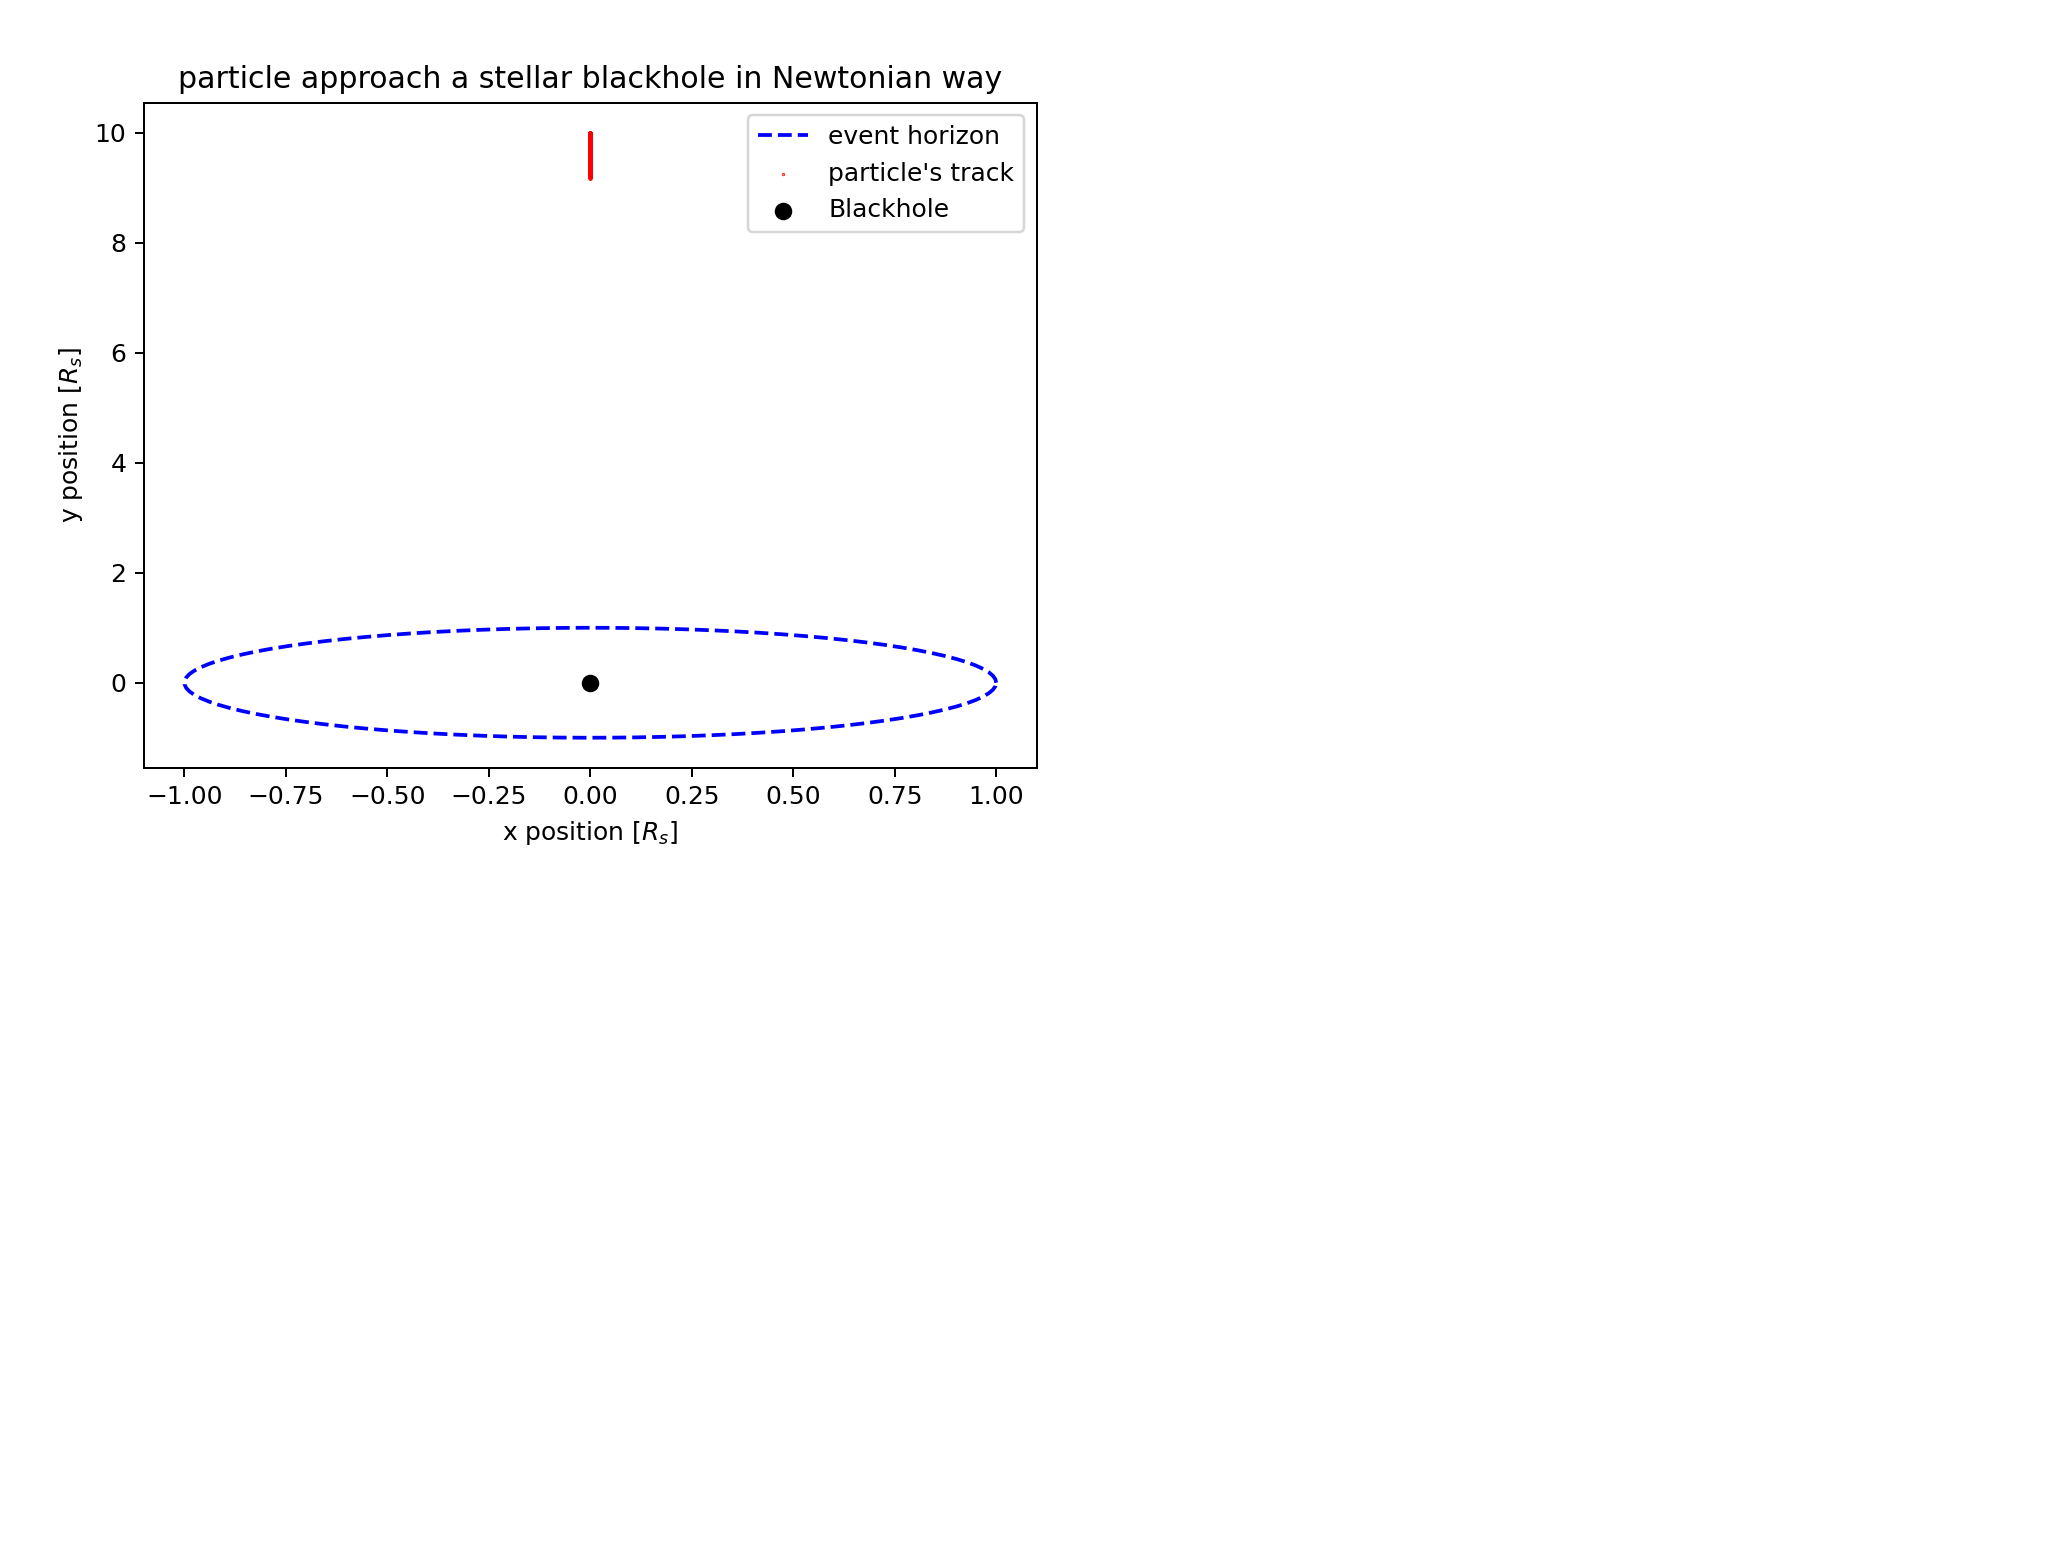

Text(0, 0.5, 'y position [$R_s$]')

In [30]:
plt.figure()
plt.scatter(x_array/rs, y_array/rs, c = 'r', s=0.1, label = "particle's track")
plt.scatter(0,0, c = 'k', label = "Blackhole")
plt.plot(rsx/rs,rsy/rs, '--',  c = 'blue', label = "event horizon")
#plt.plot(rtx/rs,rty/rs, c = 'orange', label = "tidal disruption radius")
plt.legend()
plt.title("particle approach a stellar blackhole in Newtonian way")
plt.xlabel(r'x position [$R_s$]')
plt.ylabel("y position [$R_s$]")